# Jane Street Market Prediction

## Data

1. example_sample_submission.csv<br>
    ts_id, action : 아이디 별 예측한 값
    
2. example_test.csv, train.csv<br>
    ts_id,weight,resp,feature : 아이디 별 가중치,기록 데이터, 반환값
    
3. feature.csv<br>
    feature, tag : 익명화 된 기능과 관련된 메타 데이터

In [1]:
import tensorflow as tf
import numpy as np
seed = 1111
tf.random.set_seed(seed)
np.random.seed(seed)

## Data Processing

이 데이터는 실제 주식 시장 데이터를 나타내는 익명화된 기능 집합 'feature_'이 포함되어있다. 각 행은 거래 기회를 나타낸다. 이런 기회들을 합쳐서 1은 거래함, 0은 거래안함 데이터를 전달한다. 각 거래에는 관련 가중치(weight)와 응답이 있으며 이는 함께 거래 수익을 나타낸다.

날짜열은 거래일을 나타내는 정수이고, ts_id는 시간 주문을 나타낸다. 익명화된 집합 외뎅도 feature.csv의 기능에 대한 메타 데이터가 제공된다.

train.csv에 있는 resp값과 다른 시간 범위에 대한 수익을 나타내는 몇 가지 다른 'resp_' 값이 제공된다. 이러한 변수는 테스트 데이터에 포함되지는 않는다. 가중치가 0인 거래는 완전성을 위해서 의도적으로 데이터에 포함 시켰지만 이러한 거래는 점수 평가에 기여하지는 않는다.

In [2]:
import pandas as pd

df_train = pd.read_csv("C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/2번째/data/train.csv")

In [14]:
df_train

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390486,499,0.000000,0.000142,0.000142,0.005829,0.020342,0.015396,1,-1.649365,-1.169996,...,-1.896874,-1.260055,1.947725,-1.994399,-1.685163,-2.866165,-0.216130,-1.892048,0.901585,2390486
2390487,499,0.000000,0.000012,0.000012,-0.000935,-0.006326,-0.004718,1,2.432943,5.284504,...,-0.936553,1.064936,3.119762,-0.419796,-0.208975,-0.146749,0.730166,0.648452,2.068737,2390487
2390488,499,0.000000,0.000499,0.000499,0.007605,0.024907,0.016591,1,-0.622475,-0.963682,...,-2.956745,-0.640334,-2.279663,-0.950259,-4.388417,-1.669922,-3.288939,-1.336142,-2.814239,2390488
2390489,499,0.283405,-0.000156,-0.000156,-0.001375,-0.003702,-0.002004,-1,-1.463757,-1.107228,...,-2.035894,-1.780962,0.881246,-2.202140,-1.912601,-3.341684,-0.571188,-2.185795,0.627452,2390489


In [6]:
df_train.columns

Index(['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp',
       'feature_0', 'feature_1', 'feature_2',
       ...
       'feature_121', 'feature_122', 'feature_123', 'feature_124',
       'feature_125', 'feature_126', 'feature_127', 'feature_128',
       'feature_129', 'ts_id'],
      dtype='object', length=138)

In [17]:
df_train['action'] = 0
df_train.loc[(df_train['resp']>0),'action']=1

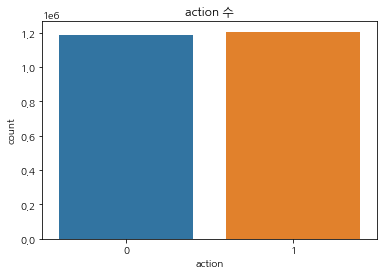

In [18]:
# 예측하려는 값이 반반이니 굳이 데이터를 생성하지 않아도 될듯될듯
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
sns.countplot(x='action',data=df_train)
plt.title("action 수")
plt.show()

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 139 entries, date to action
dtypes: float64(135), int64(4)
memory usage: 2.5 GB


In [31]:
df_train.describe()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id,action
count,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,...,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06,1.981287e+06
mean,2.526263e+02,3.657652e+00,1.519922e-04,2.124634e-04,3.074072e-04,5.020192e-04,4.721902e-04,5.960267e-03,5.035693e-01,4.236199e-01,...,4.582887e-01,1.755043e-01,4.496801e-01,1.649020e-01,5.061868e-01,1.592968e-01,4.811633e-01,1.605560e-01,1.216696e+06,5.044130e-01
std,1.512144e+02,8.291001e+00,9.324476e-03,1.285641e-02,1.991720e-02,3.436747e-02,2.816607e-02,9.999825e-01,2.623796e+00,2.513707e+00,...,2.116847e+00,1.897591e+00,1.759968e+00,2.175598e+00,2.555459e+00,1.745576e+00,2.335362e+00,1.712118e+00,6.853098e+05,4.999807e-01
min,0.000000e+00,6.912442e-03,-3.675043e-01,-5.328334e-01,-5.681196e-01,-5.987447e-01,-5.493845e-01,-1.000000e+00,-3.172026e+00,-3.093182e+00,...,-5.647779e+00,-6.029281e+00,-4.080720e+00,-8.136407e+00,-7.903043e+00,-5.765982e+00,-7.024909e+00,-5.129002e+00,1.000000e+00,0.000000e+00
25%,1.130000e+02,3.786683e-01,-1.939318e-03,-2.777549e-03,-5.248402e-03,-9.680324e-03,-7.466364e-03,-1.000000e+00,-1.195116e+00,-1.206613e+00,...,-1.028341e+00,-1.012376e+00,-8.133193e-01,-1.238382e+00,-1.293966e+00,-9.326021e-01,-1.162197e+00,-9.014039e-01,6.300985e+05,0.000000e+00
50%,2.610000e+02,1.072844e+00,4.759053e-05,7.172624e-05,1.235709e-04,1.353374e-04,9.596080e-05,1.000000e+00,1.572825e-01,1.039031e-01,...,1.381494e-01,-9.725157e-02,1.576092e-01,-5.199887e-02,2.173964e-01,-5.577561e-02,1.710797e-01,-7.504061e-02,1.226025e+06,1.000000e+00
75%,3.850000e+02,3.196557e+00,2.193924e-03,3.078691e-03,5.710722e-03,1.023963e-02,7.903929e-03,1.000000e+00,1.756368e+00,1.645332e+00,...,1.555696e+00,1.180962e+00,1.357358e+00,1.291355e+00,1.951678e+00,1.014398e+00,1.750023e+00,1.018737e+00,1.810380e+06,1.000000e+00
max,4.990000e+02,1.672937e+02,2.453477e-01,2.949339e-01,3.265597e-01,5.113795e-01,4.484616e-01,1.000000e+00,7.442989e+01,1.480763e+02,...,4.812516e+01,1.241175e+02,6.514517e+01,7.052807e+01,5.872849e+01,6.932221e+01,5.119038e+01,1.164568e+02,2.390489e+06,1.000000e+00


In [20]:
# 빈 컬럼들이 보이므로 결측값을 처리해줘야 한다.
df_train.isnull().sum()

date              0
weight            0
resp_1            0
resp_2            0
resp_3            0
               ... 
feature_127    8853
feature_128    1921
feature_129    1921
ts_id             0
action            0
Length: 139, dtype: int64

feature_27     395535
feature_18     395535
feature_17     395535
feature_28     395535
feature_7      393135
                ...  
feature_3         448
feature_122       223
feature_123       223
feature_59         48
feature_58          1
Length: 88, dtype: int64


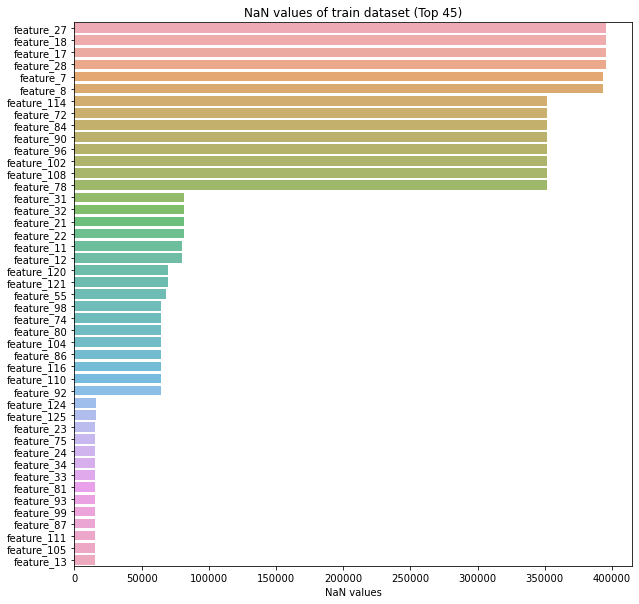

In [13]:
#Checking Missing Values in the features
n_features = 45
nan_val = df_train.isna().sum()[df_train.isna().sum() > 0].sort_values(ascending=False)
print(nan_val)

import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(10, 10))

sns.barplot(y = nan_val.index[0:n_features], 
            x = nan_val.values[0:n_features], 
            alpha = 0.8
           )

plt.title(f'NaN values of train dataset (Top {n_features})')
plt.xlabel('NaN values')
fig.savefig(f'nan_values_top_{n_features}_features.png')
plt.show()

In [21]:
# 결측값을 평균으로 처리해줌
df_train.fillna(df_train.mean(), inplace=True)

In [22]:
# 잘 처리되었다.
df_train.isnull().sum()

date           0
weight         0
resp_1         0
resp_2         0
resp_3         0
              ..
feature_127    0
feature_128    0
feature_129    0
ts_id          0
action         0
Length: 139, dtype: int64

가중치가 0인 거래는 완전성을 위해서 의도적으로 데이터에 포함 시켰지만 이러한 거래는 점수 평가에 기여하지는 않는다.

In [25]:
df_train = df_train[df_train['weight'] != 0]

In [26]:
df_train

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id,action
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1,0
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4,0
6,0,0.190575,-0.001939,-0.002301,0.001088,0.005963,0.000709,-1,-3.172026,-3.093182,...,0.336873,4.076447,0.614783,6.622176,0.800618,5.231595,0.361506,3.921714,6,1
7,0,3.820844,0.017395,0.021361,0.031163,0.036970,0.033473,-1,0.446050,-0.466210,...,2.101997,4.846202,1.479875,5.261328,2.305066,4.571762,2.201537,4.429745,7,1
8,0,0.116557,-0.005460,-0.007301,-0.009085,-0.003546,-0.001677,1,-3.172026,-3.093182,...,1.537913,4.785838,1.637435,6.968002,2.354338,5.825499,1.778029,4.740577,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390444,499,56.694795,0.001607,0.001607,-0.001245,-0.012068,-0.010023,-1,1.538675,2.530447,...,-0.984942,1.129901,-1.632432,-2.169964,-2.371293,-0.889212,-1.554352,0.215984,2390444,0
2390446,499,1.650055,0.004523,0.004523,0.003172,-0.013886,-0.013637,1,0.270380,-1.231874,...,1.724863,-0.984278,1.413825,-1.598825,2.087731,-1.126050,1.590538,-1.250209,2390446,0
2390478,499,0.895142,0.000486,0.000486,-0.004090,-0.008105,-0.005441,-1,-0.134380,0.160580,...,-0.765664,-2.148415,-0.599358,-3.155134,-0.957971,-2.285314,-0.894580,-2.064227,2390478,0
2390481,499,2.967272,0.000298,0.000298,-0.005393,-0.012472,-0.006681,-1,-0.779554,-0.597258,...,1.173186,-1.215499,0.170404,-3.433334,0.496345,-2.224752,1.207851,-1.264984,2390481,0


### resp

a total of 500 days of data in train.csv

<AxesSubplot:xlabel='Trade', ylabel='Cumulative resp'>

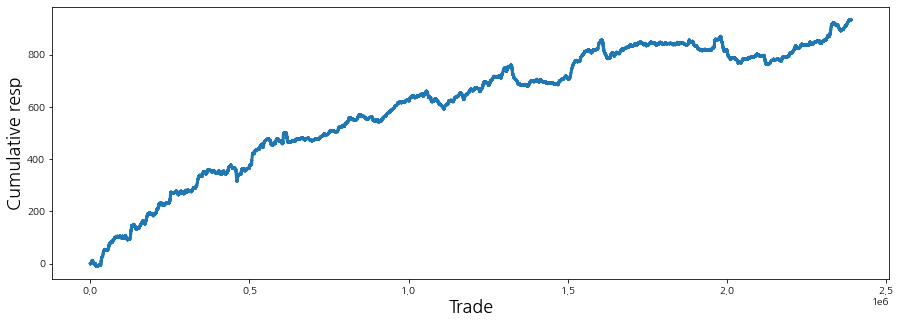

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
balance = pd.Series(df_train['resp']).cumsum() # 누적합
ax.set_xlabel("Trade", fontsize=18)
ax.set_ylabel("Cumulative resp", fontsize=18)
balance.plot(lw=3)

4개의 시간 지평

시간 지평선이 길수록 투자자는 더 공격적이거나 위험한 포트폴리오를 구축한다.
시간 지평선이 짧을수록 투자자는 더 보수적이거나 덜 위험할 수 있다.

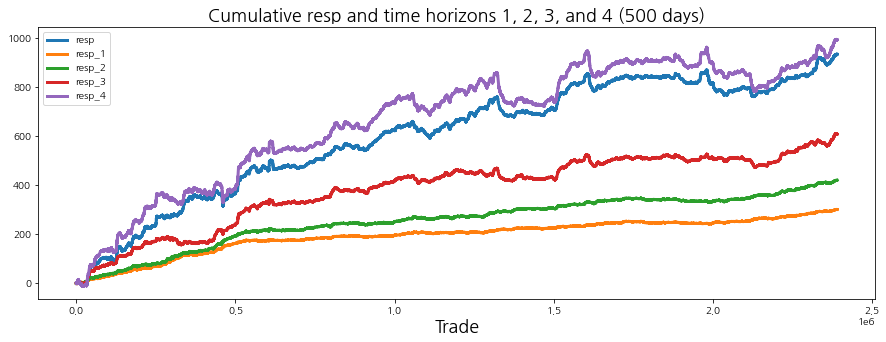

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
balance= pd.Series(df_train['resp']).cumsum()
resp_1= pd.Series(df_train['resp_1']).cumsum()
resp_2= pd.Series(df_train['resp_2']).cumsum()
resp_3= pd.Series(df_train['resp_3']).cumsum()
resp_4= pd.Series(df_train['resp_4']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_title ("Cumulative resp and time horizons 1, 2, 3, and 4 (500 days)", fontsize=18)
balance.plot(lw=3)
resp_1.plot(lw=3)
resp_2.plot(lw=3)
resp_3.plot(lw=3)
resp_4.plot(lw=3)
plt.legend(loc="upper left");

resp가 resp_4와 가장 가깝게 따르는 모습을 확인할 수 있다.

In [33]:
from sklearn.model_selection import train_test_split
X = df_train.loc[:,df_train.columns.str.contains('feature')]
y = df_train.loc[:,'action']

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2, random_state=42)

In [36]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

In [46]:
clf = xgb.XGBClassifier()

In [47]:
clf.fit(X_train, y_train)

C:\Users\hu612\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

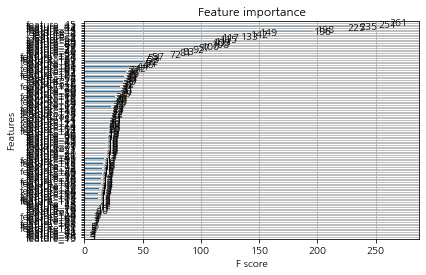

In [52]:
from xgboost import plot_importance
plot_importance(clf)

In [49]:
print(clf.score(X_train, y_train))

0.569127126380653


In [50]:
y_pred = clf.predict(X_valid)

In [54]:
from sklearn.metrics import mean_absolute_error 
print("Mean Absolute Error : " + str(mean_absolute_error(y_valid, y_pred)))

Mean Absolute Error : 0.44916190966491526


In [4]:

df_test = pd.read_csv("C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/2번째/data/example_test.csv")

df_sample_pred = pd.read_csv("C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/2번째/data/example_sample_submission.csv")

In [64]:
# for (df_test, df_sample_pred) in iter_test:
X_test = df_test.loc[:, df_test.columns.str.contains('feature')]
X_test.fillna(-999)
y_preds = clf.predict(X_test)
df_sample_pred.action = y_preds